## Lot size Determination Based on Trade Certainty/Setup

* Risk-Reward Rations: Amount of percentage to put at risk for each trade, and adjusted lot size.
* Volatility Considerations: Volatile markets are fast, but extreme volatility is unpredictable and increases the overall risk.
* Certainty of the Setup/signal: How certain are we about the setup, if we are detecting more than one setup, each would lead to a different lot size.

In [2]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
def get_data(symbol:str):
    data = yf.download(tickers=symbol, period='max', interval='1d')
    data.reset_index(inplace=True, drop=True)
    return data

In [6]:
data = get_data('BTC-USD')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
3679,63192.945312,63272.652344,62035.636719,62851.375000,62851.375000,18177529690
3680,62848.398438,66482.492188,62442.152344,66046.125000,66046.125000,43706958056
3681,66050.367188,67881.679688,64809.195312,67041.109375,67041.109375,48863870879
3682,67042.460938,68375.289062,66758.726562,67612.718750,67612.718750,38195189534


In [7]:
def calculate_sma(data, length:int):
    return ta.sma(data['Close'], length)

# calculate sma
data['SMA'] = calculate_sma(data, 20)
data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,SMA
19,320.389008,345.134003,302.559998,330.079010,330.079010,79011800,389.910399
20,330.584015,339.247009,320.481995,336.187012,336.187012,49199900,383.853049
21,336.115997,354.364014,327.187988,352.940002,352.940002,54736300,380.278049
22,352.747986,382.726013,347.687012,365.026001,365.026001,83641104,378.789549
23,364.687012,375.066986,352.963013,361.562012,361.562012,43665700,376.422450
...,...,...,...,...,...,...,...
3679,63192.945312,63272.652344,62035.636719,62851.375000,62851.375000,18177529690,62809.477148
3680,62848.398438,66482.492188,62442.152344,66046.125000,66046.125000,43706958056,62896.684961
3681,66050.367188,67881.679688,64809.195312,67041.109375,67041.109375,48863870879,63091.583203
3682,67042.460938,68375.289062,66758.726562,67612.718750,67612.718750,38195189534,63213.168164


## __1 - Slope of MAs__

In [9]:
def calculate_slope(series, period:int = 5):
    slopes = [0 for _ in range(period-1)]
    for i in range(period-1, len(series)):
        x = np.arange(period)
        y = series[i-period+1:i+1].values
        slope = np.polyfit(x, y, 1)[0] # calculate the slope using linear regression
        percent_slope = (slope / y[0]) * 100 # converts the slope to a percentage
        slopes.append(percent_slope)
    return slopes

In [18]:
y

array([383.85304871, 380.27804871, 378.78954926, 376.42245026,
       374.5963501 , 373.41620026, 371.14735107, 370.0306015 ,
       369.19055176, 368.09710236])

In [23]:
# Calculate the Slope
data['slope'] = calculate_slope(data['SMA'])
data.reset_index(inplace=True, drop=True)
data

,Open,High,Low,Close,Adj Close,Volume,SMA,slope
0,320.389008,345.134003,302.559998,330.079010,330.079010,79011800,389.910399,0.000000
1,330.584015,339.247009,320.481995,336.187012,336.187012,49199900,383.853049,0.000000
2,336.115997,354.364014,327.187988,352.940002,352.940002,54736300,380.278049,0.000000
3,352.747986,382.726013,347.687012,365.026001,365.026001,83641104,378.789549,0.000000
4,364.687012,375.066986,352.963013,361.562012,361.562012,43665700,376.422450,-0.821712
...,...,...,...,...,...,...,...,...
3660,63192.945312,63272.652344,62035.636719,62851.375000,62851.375000,18177529690,62809.477148,-0.087313
3661,62848.398438,66482.492188,62442.152344,66046.125000,66046.125000,43706958056,62896.684961,-0.009646
3662,66050.367188,67881.679688,64809.195312,67041.109375,67041.109375,48863870879,63091.583203,0.084970
3663,67042.460938,68375.289062,66758.726562,67612.718750,67612.718750,38195189534,63213.168164,0.165779


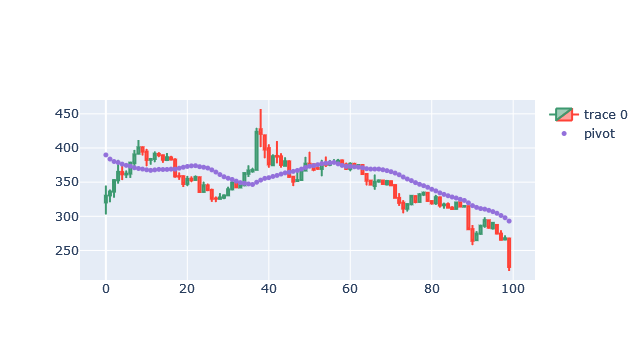

In [24]:
dfpl = data[:100]
fig = go.Figure(data = [go.Candlestick(x=dfpl.index,
                                       open=dfpl['Open'],
                                       high=dfpl['High'],
                                       low=dfpl['Low'],
                                       close=dfpl['Close'])])
fig.add_scatter(x=dfpl.index, y=dfpl['SMA'], mode='markers', marker=dict(size=5, color='MediumPurple'),
                name='pivot')
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()
                                           

## __2 - 3 MAs alignment__

In [26]:
# calculate ma
data['SMA_10'] = calculate_sma(data, 10)
data['SMA_20'] = calculate_sma(data, 20)
data['SMA_30'] = calculate_sma(data, 30)
data.reset_index(inplace=True, drop=True) # Drops null values and resets the index
data

,Open,High,Low,Close,Adj Close,Volume,SMA,slope,SMA_10,SMA_20,SMA_30
0,327.161011,331.766998,325.076996,330.492004,330.492004,15655500,357.901399,-0.873709,NaN,NaN,NaN
1,330.683014,343.368988,330.683014,339.485992,339.485992,19817200,355.747899,-0.853210,NaN,NaN,NaN
2,339.458008,352.966003,338.424011,349.290009,349.290009,18797000,354.024500,-0.736909,NaN,NaN,NaN
3,349.817993,352.731995,341.776001,342.415009,342.415009,16834200,351.573151,-0.635849,NaN,NaN,NaN
4,342.153992,347.032013,342.153992,345.488007,345.488007,8535470,349.370251,-0.593377,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3631,63192.945312,63272.652344,62035.636719,62851.375000,62851.375000,18177529690,62809.477148,-0.087313,62069.109766,62809.477148,62401.167057
3632,62848.398438,66482.492188,62442.152344,66046.125000,66046.125000,43706958056,62896.684961,-0.009646,62466.974609,62896.684961,62602.533854
3633,66050.367188,67881.679688,64809.195312,67041.109375,67041.109375,48863870879,63091.583203,0.084970,62962.090625,63091.583203,62864.476302
3634,67042.460938,68375.289062,66758.726562,67612.718750,67612.718750,38195189534,63213.168164,0.165779,63441.467187,63213.168164,63178.483333


In [27]:
def determine_trend(data):
    if data['SMA_10'] > data['SMA_20'] > data['SMA_30']:
        return 2 # uptrend
    elif data['SMA_10'] < data['SMA_20'] < data['SMA_30']:
        return 1
    else:
        return 0
# Determine the trend and add it as a new column to the DataFrae
data['Trend'] = data.apply(determine_trend, axis=1)
data

,Open,High,Low,Close,Adj Close,Volume,SMA,slope,SMA_10,SMA_20,SMA_30,Trend
0,327.161011,331.766998,325.076996,330.492004,330.492004,15655500,357.901399,-0.873709,NaN,NaN,NaN,0
1,330.683014,343.368988,330.683014,339.485992,339.485992,19817200,355.747899,-0.853210,NaN,NaN,NaN,0
2,339.458008,352.966003,338.424011,349.290009,349.290009,18797000,354.024500,-0.736909,NaN,NaN,NaN,0
3,349.817993,352.731995,341.776001,342.415009,342.415009,16834200,351.573151,-0.635849,NaN,NaN,NaN,0
4,342.153992,347.032013,342.153992,345.488007,345.488007,8535470,349.370251,-0.593377,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,63192.945312,63272.652344,62035.636719,62851.375000,62851.375000,18177529690,62809.477148,-0.087313,62069.109766,62809.477148,62401.167057,0
3632,62848.398438,66482.492188,62442.152344,66046.125000,66046.125000,43706958056,62896.684961,-0.009646,62466.974609,62896.684961,62602.533854,0
3633,66050.367188,67881.679688,64809.195312,67041.109375,67041.109375,48863870879,63091.583203,0.084970,62962.090625,63091.583203,62864.476302,0
3634,67042.460938,68375.289062,66758.726562,67612.718750,67612.718750,38195189534,63213.168164,0.165779,63441.467187,63213.168164,63178.483333,2


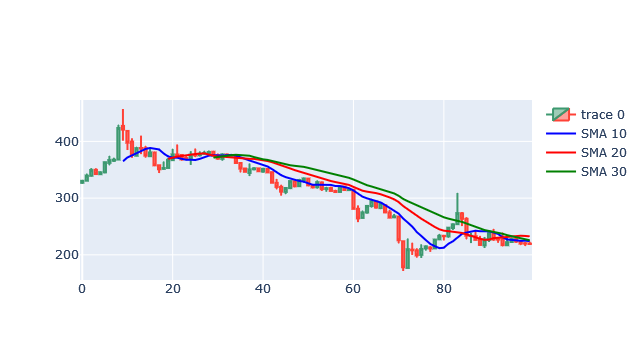

In [29]:
dfpl = data[:100]
fig = go.Figure(data = [go.Candlestick(x=dfpl.index,
                                       open=dfpl['Open'],
                                       high=dfpl['High'],
                                       low=dfpl['Low'],
                                       close=dfpl['Close'])])
# add the ma to the plot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['SMA_10'], mode='lines', name='SMA 10', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['SMA_20'], mode='lines', name='SMA 20', line=dict(color='red')))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['SMA_30'], mode='lines', name='SMA 30', line=dict(color='green')))
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()
                                           

## __3 - Candles above or Below the MA curve__

In [30]:
def check_candles(data, backcandles, ma_column):
    categories = [0 for _ in range(backcandles)]
    for i in range(backcandles, len(data)):
        if all(data['Close'][i-backcandles:i] > data[ma_column][i-backcandles:i]):
            categories.append(2) # uptrend
        elif all(data['Close'][i-backcandles:i] < data[ma_column][i-backcandles:i]):
            categories.append(1) # downtrend
        else:
            categories.append(0) # no trend
    return categories

In [31]:
data['Category'] = check_candles(data, 5, 'SMA_20')
data[25:55]

,Open,High,Low,Close,Adj Close,Volume,SMA,slope,SMA_10,SMA_20,SMA_30,Trend,Category
25,376.152008,387.601013,372.144989,375.490997,375.490997,15375600,377.765848,0.317791,367.140799,377.765848,NaN,0,0
26,375.510010,382.527008,373.308990,378.046997,378.046997,9194440,378.321997,0.275641,369.161499,378.321997,NaN,0,0
27,378.248993,383.661987,376.669006,379.244995,379.244995,11763000,378.899496,0.206423,372.001199,378.899496,NaN,0,1
28,379.250000,384.037994,377.863007,381.315002,381.315002,12364100,376.787196,0.010580,374.840698,376.787196,NaN,0,0
29,381.721985,383.026001,374.346008,375.010010,375.010010,13340100,374.500948,-0.213481,375.584399,374.500948,371.312300,2,0
30,375.717987,378.654999,367.759003,369.604004,369.604004,14529600,373.090248,-0.392841,374.854700,373.090248,372.616033,2,0
31,369.441986,379.191986,365.756012,376.854004,376.854004,15181800,373.126299,-0.402306,375.005301,373.126299,373.861633,0,0
32,376.756989,378.447998,370.945007,374.785004,374.785004,7009320,372.471449,-0.265565,375.646802,372.471449,374.711466,0,0
33,374.835999,376.291992,373.274994,375.095001,375.095001,6491650,371.855800,-0.157786,376.189301,371.855800,375.800800,0,0
34,374.964996,376.028992,361.885986,361.908997,361.908997,18898700,371.191350,-0.135846,374.735501,371.191350,376.348166,0,0
